In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [4]:
mean_encoded = titanic.groupby(['Sex'])['Survived'].mean()
titanic["Sex"] = titanic["Sex"].map(mean_encoded)
titanic["Sex"]

0      0.188908
1      0.742038
2      0.742038
3      0.742038
4      0.188908
         ...   
886    0.188908
887    0.742038
888    0.742038
889    0.188908
890    0.188908
Name: Sex, Length: 891, dtype: float64

Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [5]:
titanic.Embarked.isnull().sum()

2

In [6]:
titanic.Embarked.fillna(titanic.Embarked.mode()[0],inplace=True)
titanic.Embarked.isnull().sum()

0

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
encoded_embarked = enc.fit_transform(titanic[["Embarked"]]).astype(np.uint8)
encoded_embarked

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [8]:
result = pd.DataFrame(encoded_embarked, index = titanic.index, columns = ["Embarked_C","Embarked_Q","Embarked_S"])
result

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [9]:
from sklearn.preprocessing import LabelEncoder
titanic.Cabin = titanic.Cabin.astype(str)
titanic.Cabin = LabelEncoder().fit_transform(titanic.Cabin)
titanic.Cabin

0      147
1       81
2      147
3       55
4      147
      ... 
886    147
887     30
888    147
889     60
890    147
Name: Cabin, Length: 891, dtype: int32

# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

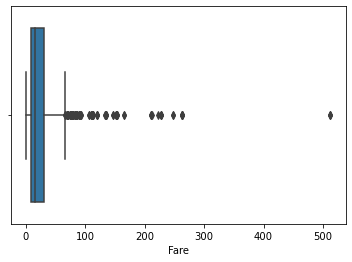

In [10]:
sns.boxplot(titanic.Fare)

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [11]:
z_score = (titanic.Fare - titanic.Fare.mean()) / titanic.Fare.std()
z_score

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64

In [12]:
(z_score>3).sum(), (z_score<-3).sum()

(20, 0)

In [13]:
max_zscore = titanic[z_score <= 3].Fare.max()
max_zscore

164.8667

In [14]:
min_zscore = titanic[z_score >= -3].Fare.min()
min_zscore

0.0

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [15]:
titanic_zscore = titanic.copy()
titanic_zscore.Fare[z_score > 3] = max_zscore
titanic_zscore.Fare[z_score < -3] = min_zscore


In [16]:
titanic_zscore.Fare.min()

0.0

In [17]:
titanic_zscore.Fare.max()

164.8667

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [18]:
Q1 = titanic.Fare.quantile(q=0.25)
Q3 = titanic.Fare.quantile(q=0.75)
IQR = Q3 - Q1
IQR

23.0896

In [19]:
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
upper,lower, len(titanic.Fare[(titanic.Fare > upper) | (titanic.Fare < lower)])

(65.6344, -26.724, 116)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [21]:
titanic_iqr = titanic.copy()
titanic_iqr.Fare[titanic.Fare > upper] = upper
titanic_iqr.Fare[titanic.Fare < lower] = lower

In [22]:
titanic_iqr.Fare.min()

0.0

In [23]:
titanic_iqr.Fare.max()

65.6344

In [24]:
titanic_iqr.Fare

0       7.2500
1      65.6344
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [25]:
titanic_hard = titanic.copy()
lower = titanic_hard.Fare.quantile(q=0.01)
upper = titanic_hard.Fare.quantile(q=0.99)
upper, lower

(249.00622000000033, 0.0)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [26]:
titanic_hard.Fare[titanic["Fare"] > upper ] = upper
titanic_hard.Fare[titanic["Fare"] < lower ] = lower

In [27]:
titanic_hard.Fare.min(),titanic_hard.Fare.max(),len(titanic_hard.Fare[(titanic.Fare > upper) | (titanic_hard.Fare < lower)])

(0.0, 249.00622000000033, 9)

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

Kullanılan metodlar doğrultusunda z-score için 20, IQR için 116 ve Hard-Edges için 9 adet outlier ile çalışıldı. Değiştirilen veri sayısının az olması daha mantıklı olduğu düşünülerek bu proje için Hard-Edges metodunun kullanılmasının daha mantıklı olduğuna karar verildi. 